In this notebook i will analyze the errors of the pipeline 

In [3]:
# Imports 
import os
import json
import shutil

In [7]:
# Path to the result directory containing JSON files
res_path = "C:\\Users\yousf\Bureau\ConvergenceAI\CHESS_Impl\\run_results\\run_20240911_205043"
# Path to error analysis directory 
target_dir="C:\\Users\yousf\Bureau\ConvergenceAI\CHESS_Impl\error_analysis"

In [ ]:
# Iterate through each file in the source directory
for json_file in os.listdir(res_path):
    if json_file.endswith('.json'):
        # Construct the full file path
        file_path = os.path.join(res_path, json_file)
        
        # Open and read the JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Check if exec_res is 0
        if data["evaluation"]["revision"]["exec_res"] == 0:
            # Copy the file to the target directory
            shutil.copy(file_path, os.path.join(target_dir, json_file))
            

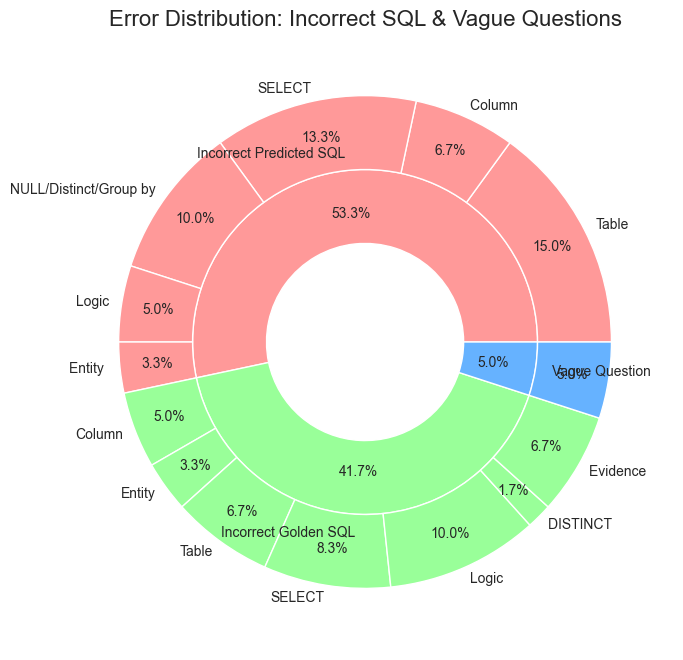

In [7]:
import matplotlib.pyplot as plt

# Data for the inner categories (main errors)
inner_labels = ['Incorrect Predicted SQL', 'Incorrect Golden SQL', 'Vague Question']
inner_sizes = [32, 25, 3]
inner_colors = ['#FF9999', '#99FF99', '#66B2FF']

# Data for the outer categories (subcategories of each error type)
outer_labels = [
    'Table', 'Column ', 'SELECT', 'NULL/Distinct/Group by', 'Logic', 'Entity ',  # Incorrect Predicted SQL
    'Column', 'Entity', 'Table', 'SELECT', 'Logic', 'DISTINCT ', 'Evidence ',  # Incorrect Golden SQL
    ''  # Vague Question
]
outer_sizes = [
    9, 4, 8, 6, 3, 2,  # Incorrect Predicted SQL
    3, 2, 4, 5, 6, 1, 4,  # Incorrect Golden SQL
    3  # Vague Question
]

# Outer colors matching the inner categories
outer_colors = [
    '#FF9999', '#FF9999', '#FF9999', '#FF9999', '#FF9999', '#FF9999',  # Matching Incorrect Predicted SQL
    '#99FF99', '#99FF99', '#99FF99', '#99FF99', '#99FF99', '#99FF99', '#99FF99',  # Matching Incorrect Golden SQL
    '#66B2FF'  # Matching Vague Question
]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot inner ring (main categories)
inner_wedges, inner_texts, _ = ax.pie(inner_sizes, radius=0.7, labels=inner_labels, colors=inner_colors,
                                      wedgeprops=dict(width=0.3, edgecolor='w'), autopct='%1.1f%%', pctdistance=0.75)

# Plot outer ring (subcategories)
outer_wedges, outer_texts, _ = ax.pie(outer_sizes, radius=1, labels=outer_labels, colors=outer_colors,
                                      wedgeprops=dict(width=0.3, edgecolor='w'), labeldistance=1.05, autopct='%1.1f%%', pctdistance=0.85)

# Set aspect ratio to equal so the pie is drawn as a circle
ax.set(aspect="equal")

# Title
plt.title("Error Distribution: Incorrect SQL & Vague Questions", fontsize=16)

plt.show()
